<div class="UnifiedCombinedUpperBars__contentHeading___1wx69"><span class="UnifiedCombinedUpperBars__contentTitle___zUoaI"><h1>DESCRIPTION</h1></span></div>
<div class="UnifiedCombinedUpperBars__contentBody___YB3i6">Donations to political parties from India, 12 Yrs data (2003-04 to 2014-15).</div>
<div class="UnifiedCombinedUpperBars__contentHeading___1wx69"><span class="UnifiedCombinedUpperBars__contentTitle___zUoaI"><br>
<div class="UnifiedCombinedUpperBars__contentBody___YB3i6">
<div class="UnifiedCombinedUpperBars__summary___2xbpp">
<div class="row">
<div class="col-xs-11">
<div class="ShowMore__container___1LHA5 ShowMore__standalone___MJJgF">
<div class="ShowMore__clipContainer___23vCN">
<div>
<h1>Coloumns</h1>
<ol>
<li>Political Party</li>
<li>Donator</li>
<li>Address</li>
<li>Pan Y/N</li>
<li>Amount</li>
<li>Contribution Mode</li>
<li>Financial Year</li>
</ol></div>
</div>
</div>
</div>
</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML,display
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
# data with online 
# data = pd.read_excel('https://query.data.world/s/ysarbes44zpg43agwtturodb4r6wgz') 

In [4]:
data = pd.read_excel('Donations to national political parties - India (1).xlsx')

In [5]:
data.sample(5) 

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
8089,BJP,Rajkamal Joshi,Others,"House No-191, Neharu Colony. Dehradoon, Uttran...",Y,100000,"80835OBC, DEHRADUN-248001",2010-11,NaN,NaN,NaN,NaN,NaN,NaN
7202,BJP,Parveen Kumar,Others,--,Y,500000,"826592,",2013-14,NaN,NaN,NaN,NaN,NaN,NaN
2330,BJP,Devbhumi Developers,Others,Mehsana,N,25000,"393, Mehsana Urbank Co-op",2012-13,NaN,NaN,NaN,NaN,NaN,NaN
8697,INC,Sabina Yasmin,Others,"Post office Phulbari, West Garo Hills",N,100000,Cash,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
8303,BJP,Ranjit singh,Others,"F-52,Jhankar Rd Kutub Vihar Phase I Delhi- 78",Y,100000,"862665,PNB",2011-12,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('Total No Of ROWs =',data.shape[0])
print('Total No Of COLUMNs =',data.shape[1])

Total No Of ROWs = 13573
Total No Of COLUMNs = 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13573 entries, 0 to 13572
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Party              13573 non-null  object 
 1   Name               13528 non-null  object 
 2   Type               13573 non-null  object 
 3   Address            13573 non-null  object 
 4   PAN Given          13573 non-null  object 
 5   Amount             13573 non-null  int64  
 6   Contribution Mode  13339 non-null  object 
 7   Financial Year     13573 non-null  object 
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        3 non-null      object 
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        1 non-null      object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.4+ MB


In [8]:
a = round((data.isnull().mean()*100),2)
mssingcolumn=[]
missingdata=[]
missingnum=[]
for i in range(len(a)):
    if a.values[i] != 0:
        mssingcolumn.append(a.keys()[i])
for i in mssingcolumn:
    missingdata.append(round((data[i].isnull().mean()*100),2))
    missingnum.append(data[i].isnull().sum())
missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
missing

,column,missing percent,missing num
0,Name,0.33,45
1,Contribution Mode,1.72,234
2,Unnamed: 8,100.00,13573
3,Unnamed: 9,100.00,13573
4,Unnamed: 10,99.98,13570
5,Unnamed: 11,100.00,13573
6,Unnamed: 12,100.00,13573
7,Unnamed: 13,99.99,13572


In [9]:
# drop all column which has missing data more than 90%
data = data.drop(columns=['Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1)

In [10]:
data.head(2) 

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15


In [11]:
allcol=data.nunique().sort_values().keys()[:-1]
allcol

Index(['Type', 'PAN Given', 'Party', 'Financial Year ', 'Amount', 'Address',
       'Contribution Mode'],
      dtype='object')

In [12]:
sapret_column=[]
for i in range(len(allcol)):
    a=data[allcol[i]].value_counts()
    if len(a) >= 15:
        print('\n\n*****  Rest of Column have more than 15 unique values *****')
        break;
    sapret_column.append(allcol[i])
    display(HTML(f'---------------- <b>  {allcol[i]}  </b> ----------------'))
    print(a)

Others             13442
Electoral Trust      131
Name: Type, dtype: int64


N    8329
Y    5244
Name: PAN Given, dtype: int64


BJP       8782
INC       3785
CPI(M)     515
CPI        384
NCP        107
Name: Party, dtype: int64


2012-13    3776
2013-14    2361
2014-15    1695
2011-12    1588
2010-11    1062
2009-10     594
2005-06     518
2004-05     500
2003-04     483
2007-08     390
2008-09     362
2006-07     244
Name: Financial Year , dtype: int64


*****  Rest of Column have more than 15 unique values *****


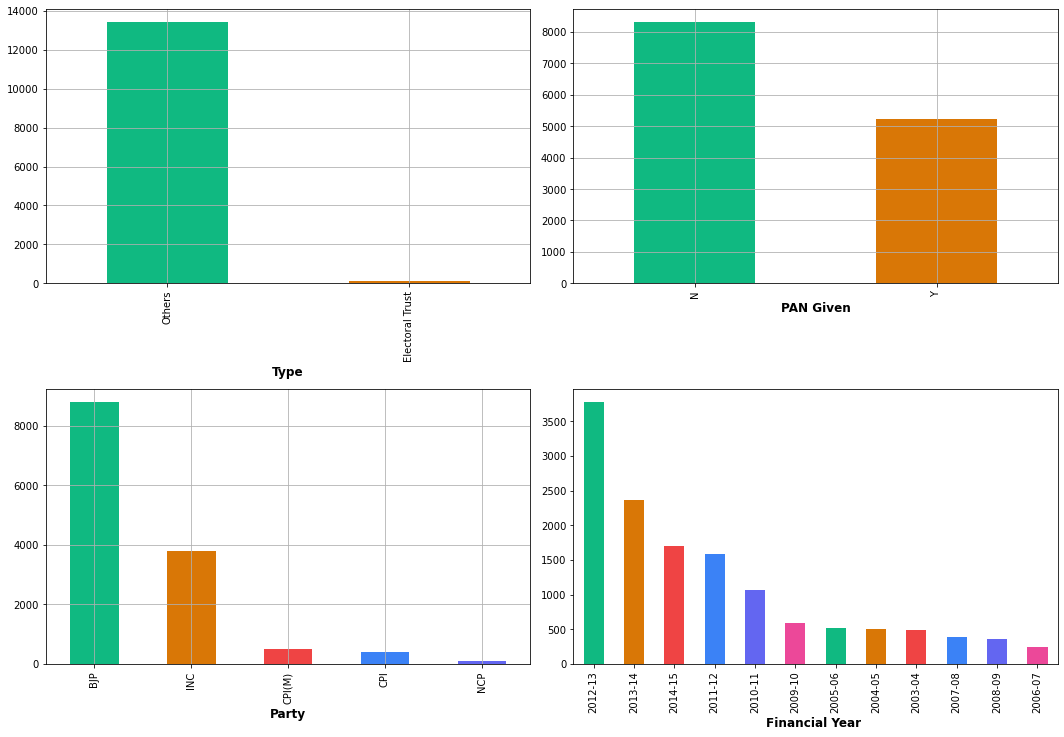

In [13]:
plt.figure(figsize=(15,20))
for i in range(len(sapret_column)):
    plt.grid()
    if i == 40:
        break;
    plt.subplot(4,2,i+1)
    plt.tight_layout() # for maintain spaceing between multple graphs
    plt.xlabel(sapret_column[i],fontsize=12.0,fontweight='bold') 
    data[sapret_column[i]].value_counts().plot(kind="bar", color = ['#10B981','#D97706','#EF4444','#3B82F6','#6366F1','#EC4899'])  
#   sns.countplot(data=dataset,x=col_key[i])

In [14]:
# amount distribution with respect of amount
financial_amt = data.groupby('Financial Year ').sum()
financial_amt

,Amount
Financial Year,
2003-04,146162222
2004-05,661603287
2005-06,99907293
2006-07,153178304
2007-08,350074020
2008-09,647906691
2009-10,1706671272
2010-11,253982700
2011-12,480926109


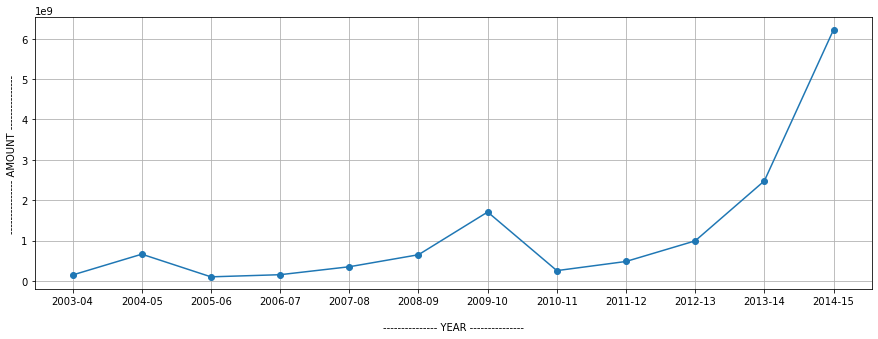

In [22]:
plt.figure(figsize=(15,5))
plt.plot(financial_amt['Amount'].index , financial_amt['Amount'],marker='o')
plt.grid()
plt.xlabel('\n--------------- YEAR ---------------')
plt.ylabel('--------------- AMOUNT ---------------')
display(HTML('<h3>Which Year All Parties Recived More Funds ?</h4>'))
plt.show()

In [16]:
data.columns

Index(['Party', 'Name', 'Type', 'Address', 'PAN Given', 'Amount',
       'Contribution Mode', 'Financial Year '],
      dtype='object')

In [17]:
# parties recived hou much funds
parties_amt = data.groupby('Party').sum() 
parties_amt

,Amount
Party,
BJP,9295525996
CPI,68123698
CPI(M),150622128
INC,4031487349
NCP,647911419


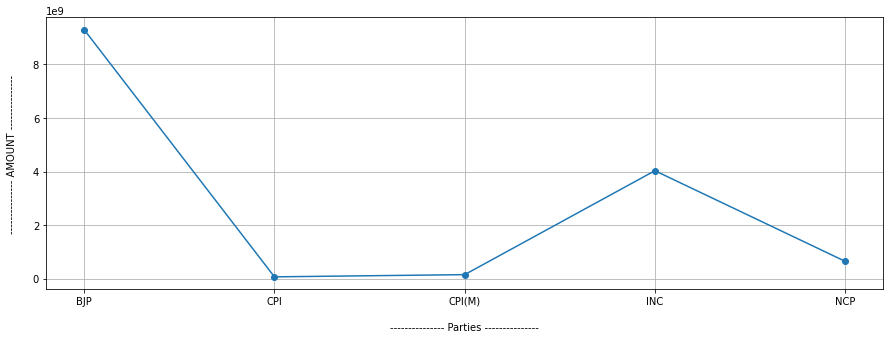

In [23]:
plt.figure(figsize=(15,5))
plt.plot(parties_amt['Amount'].index , parties_amt['Amount'],marker='o')
plt.grid()
plt.xlabel('\n--------------- Parties ---------------')
plt.ylabel('--------------- AMOUNT ---------------\n')
display(HTML('<h3>Which Party Recived More Funds ?</h4>'))
plt.show()

In [19]:
BJP_amt_years = data[data['Party'] == 'BJP']
INC_amt_years = data[data['Party'] == 'INC']
CPIM_amt_years = data[data['Party'] == 'CPI(M)']
CPI_amt_years = data[data['Party'] == 'CPI']
NCP_amt_years = data[data['Party'] == 'NCP']

In [20]:
party_amt = [BJP_amt_years,INC_amt_years,CPI_amt_years,CPIM_amt_years,NCP_amt_years]

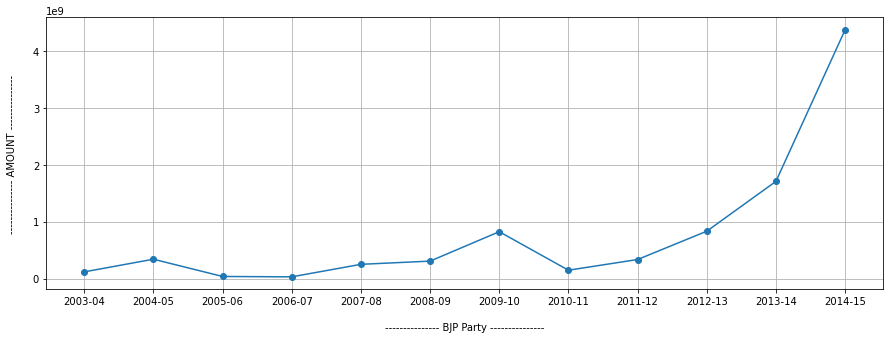

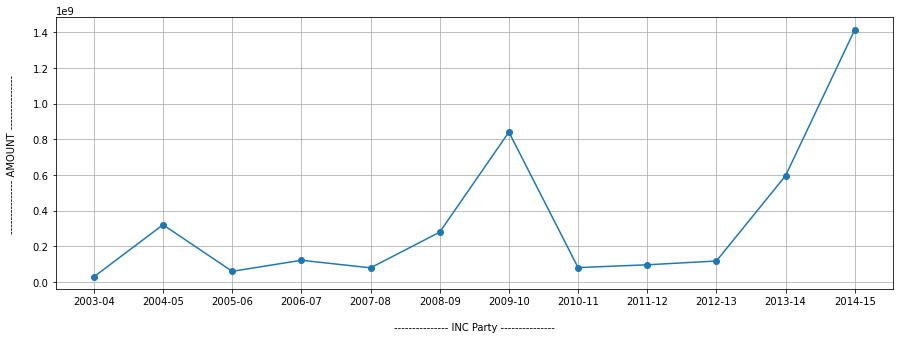

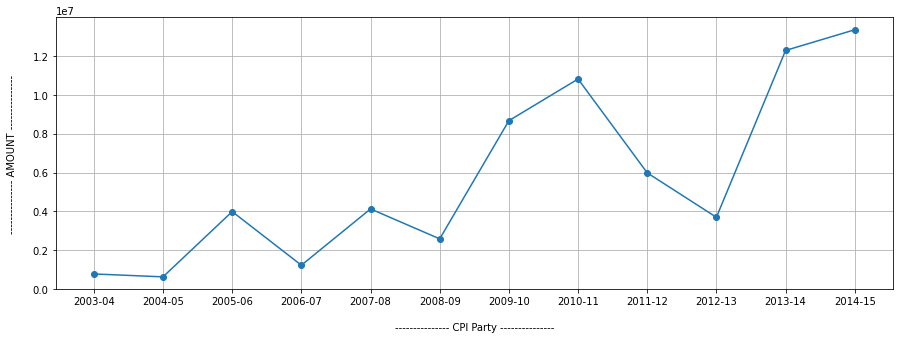

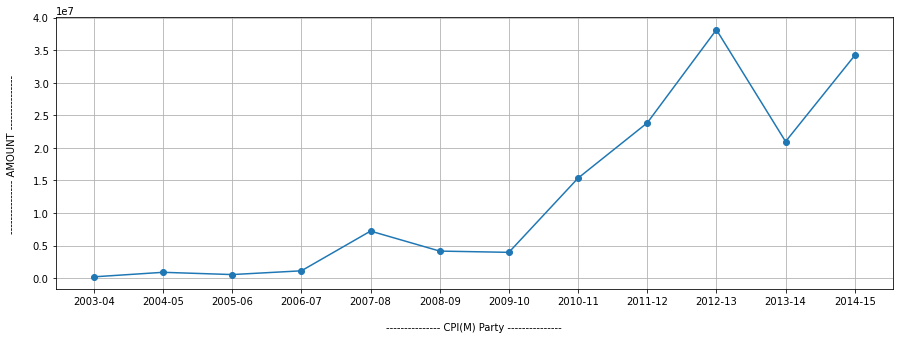

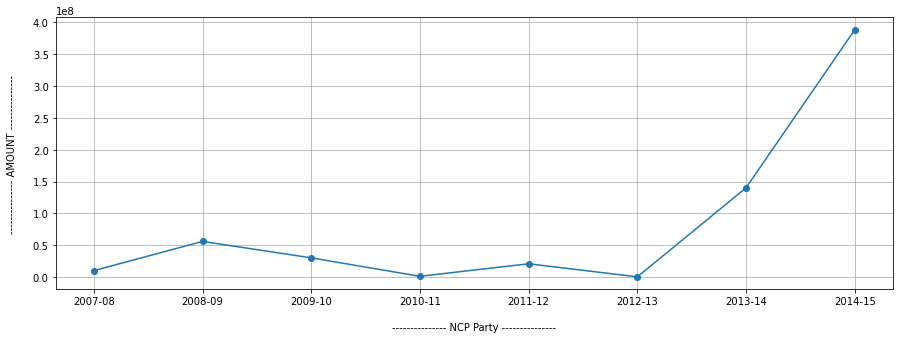

In [21]:
for i in party_amt:
    plt.figure(figsize=(15,5))
    plt.plot(i.groupby('Financial Year ').sum()['Amount'].index , i.groupby('Financial Year ').sum()['Amount'],marker='o')
    plt.grid()
    pn = i['Party'].values[0]
    plt.xlabel(f'\n--------------- {pn} Party ---------------') 
    plt.ylabel('--------------- AMOUNT ---------------\n')
    print('\n')
    display(HTML(f'<p style="font-size:30px;">Which Year <b>{pn}</b> Recived More Funds ?</p>'))
    plt.show()

In [28]:
data['Name'].value_counts() 

General Electoral Trust                 64
A.B Bardhan                             40
Torrent Power Ltd.                      38
Hannan Mollah                           36
Lodha Dwellers Pvt. Ltd.                32
                                        ..
Sahyadri Enterprises                     1
Shri L. Raja Gopal                       1
Koushalya Devi Builders & Developers     1
M/S. PRS Enterprises                     1
M.S. Air Infotech                        1
Name: Name, Length: 10923, dtype: int64

In [159]:
dictnry = {'name':[],'No_of_times':[]}
for i in range(len(data['Name'].value_counts())):
    if data['Name'].value_counts().values[i] < 10 : # who donate exacty 10 times and more than 10 times
        break;
    dictnry['name'].append( data['Name'].value_counts().index[i] )
    dictnry['No_of_times'].append( data['Name'].value_counts().values[i] )
    

In [160]:
fund_donator = pd.DataFrame(dictnry)

In [161]:
fund_donator

,name,No_of_times
0,General Electoral Trust,64
1,A.B Bardhan,40
2,Torrent Power Ltd.,38
3,Hannan Mollah,36
4,Lodha Dwellers Pvt. Ltd.,32
5,Satya Electoral Trust,31
6,Communist Party Of India,24
7,Sesa Goa Ltd.,19
8,Akik Education Centre (P) Ltd,18
9,Videocon Industries Ltd.,18


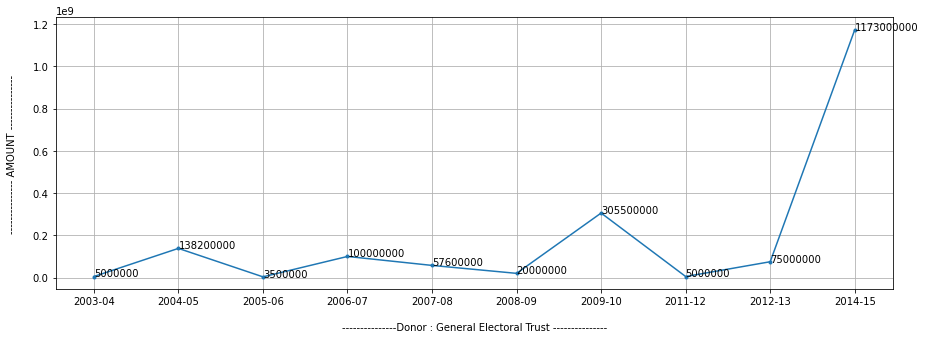

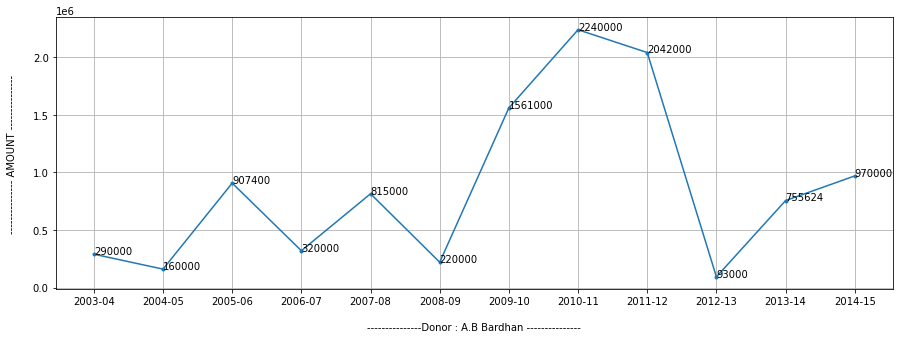

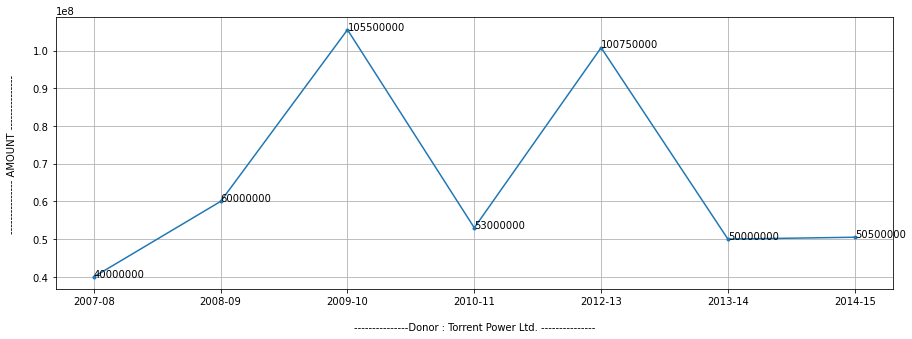

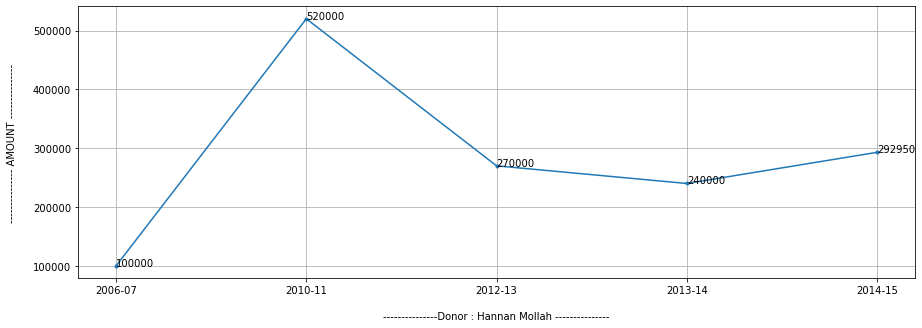

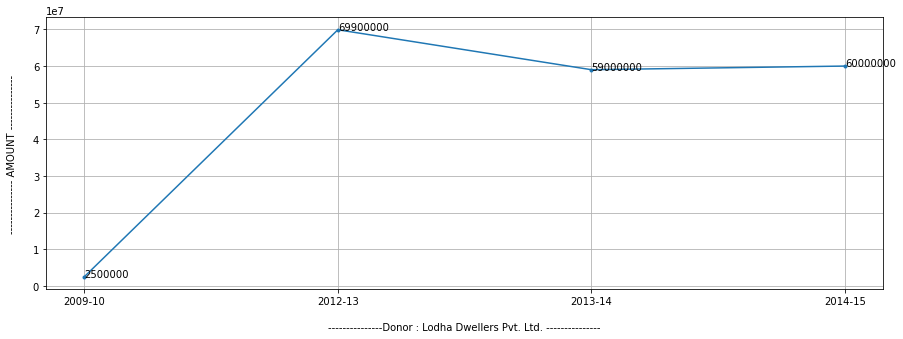

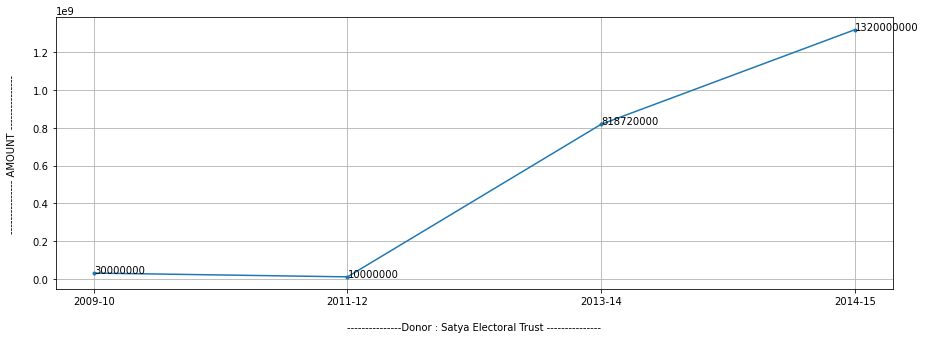

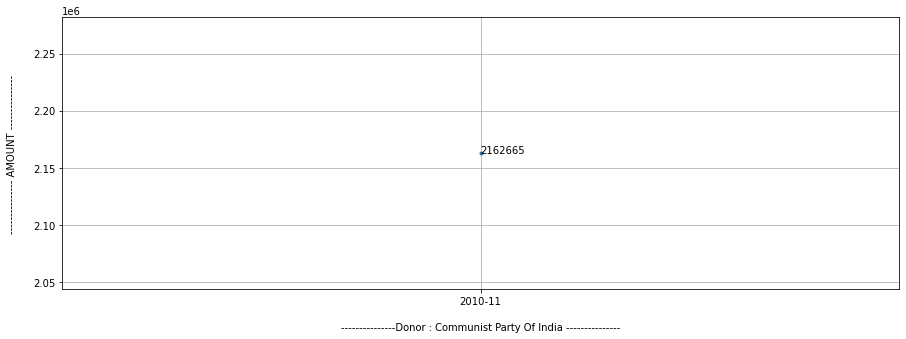

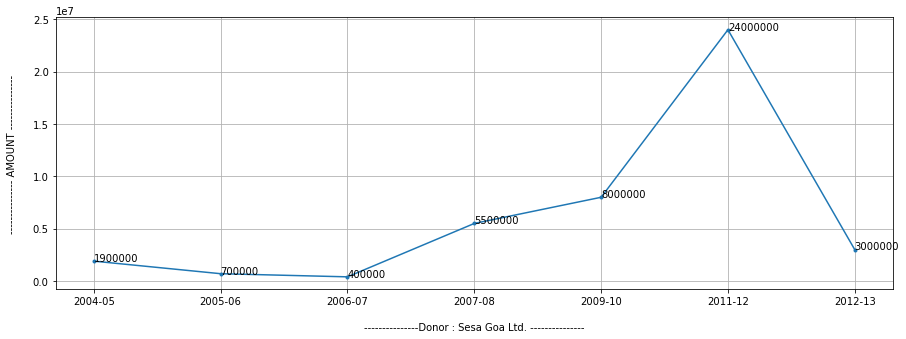

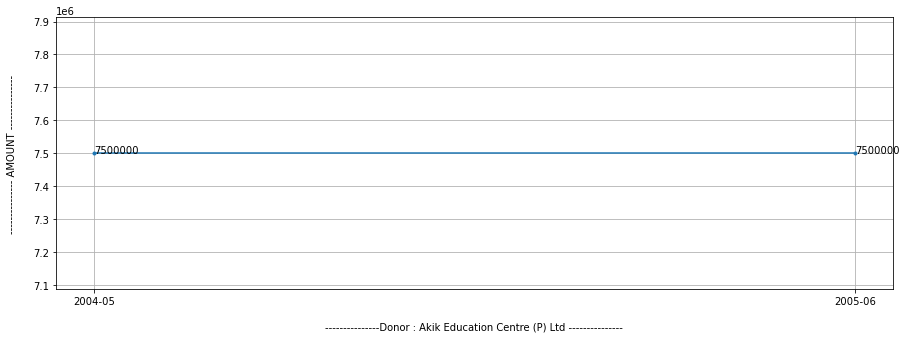

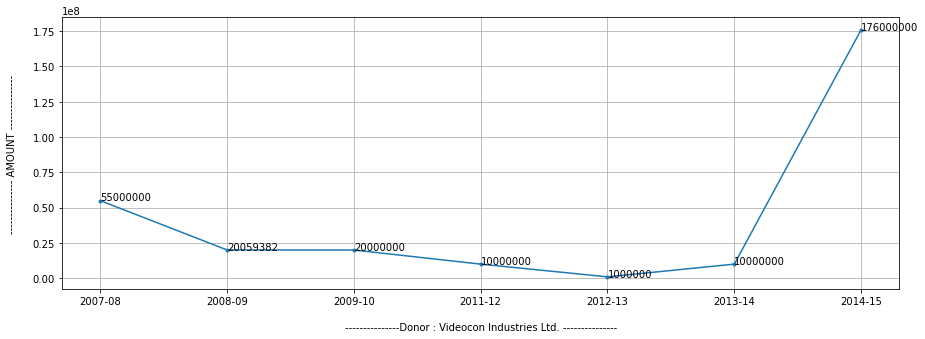

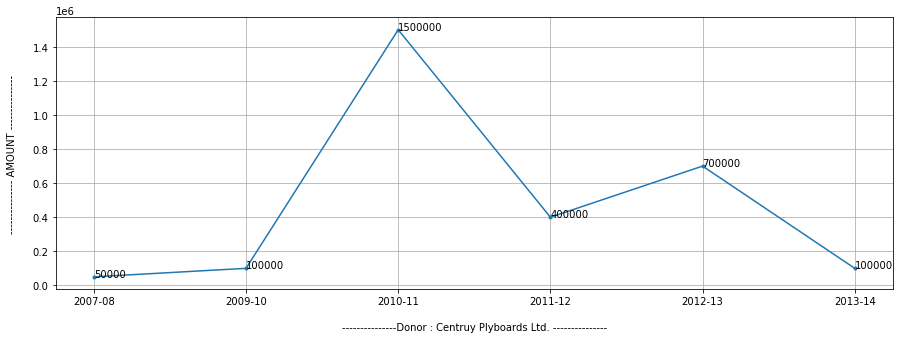

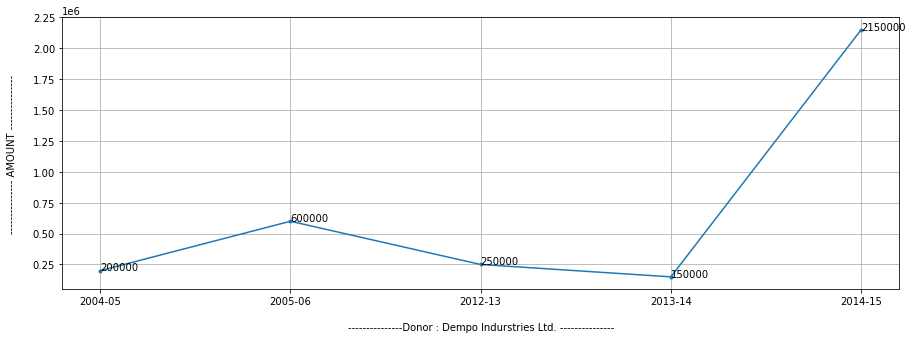

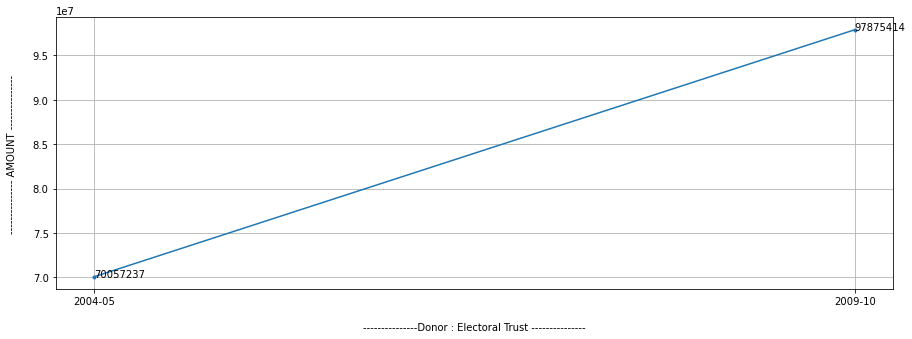

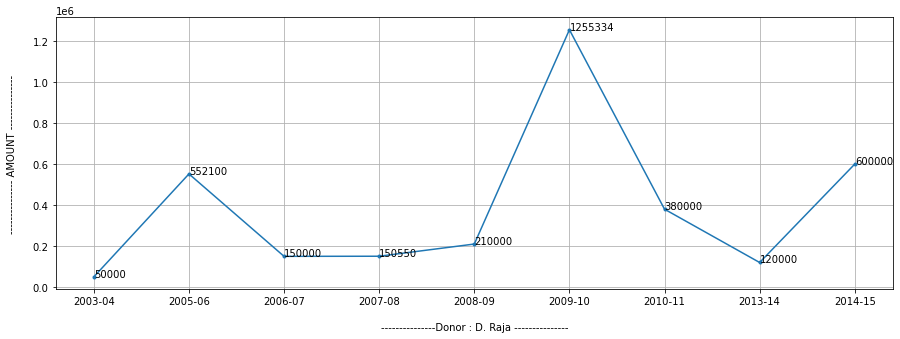

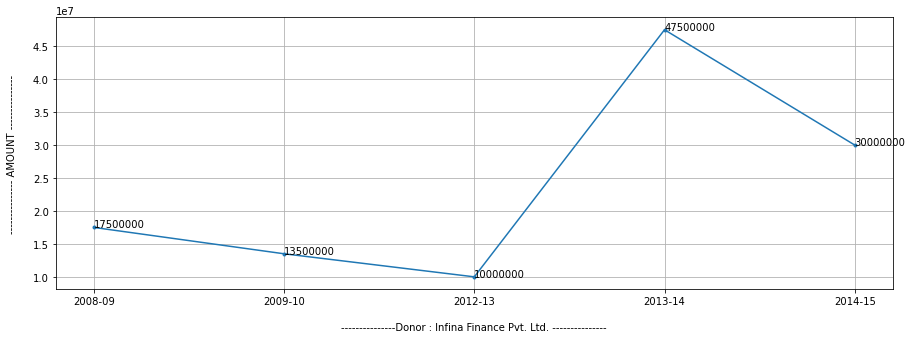

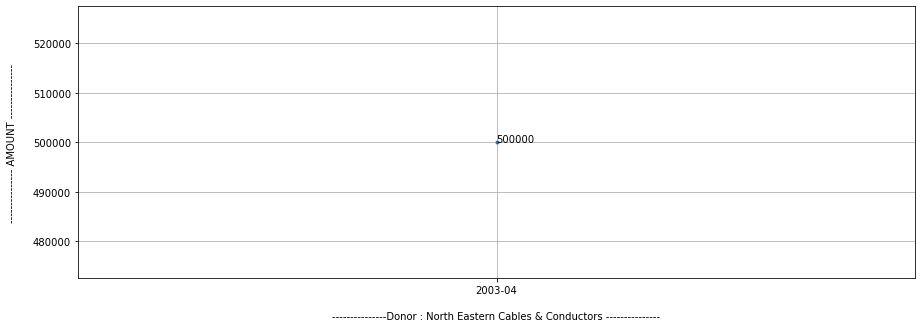

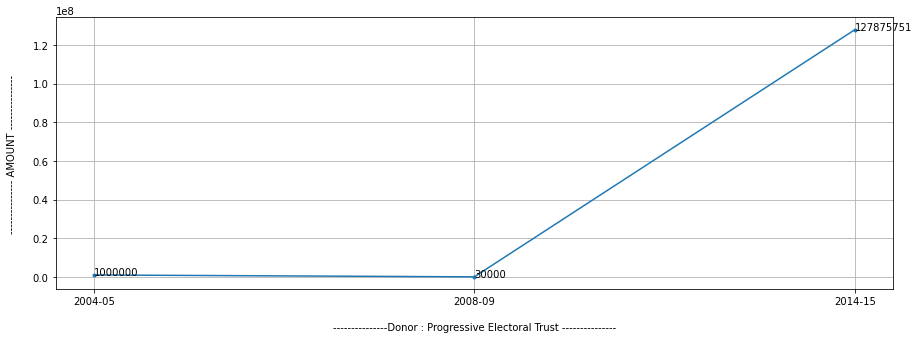

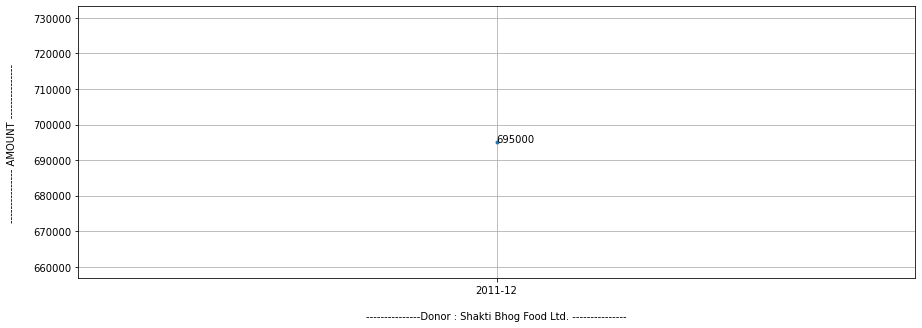

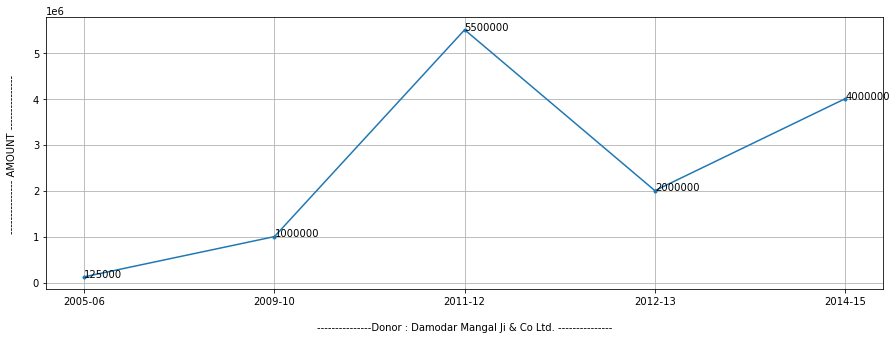

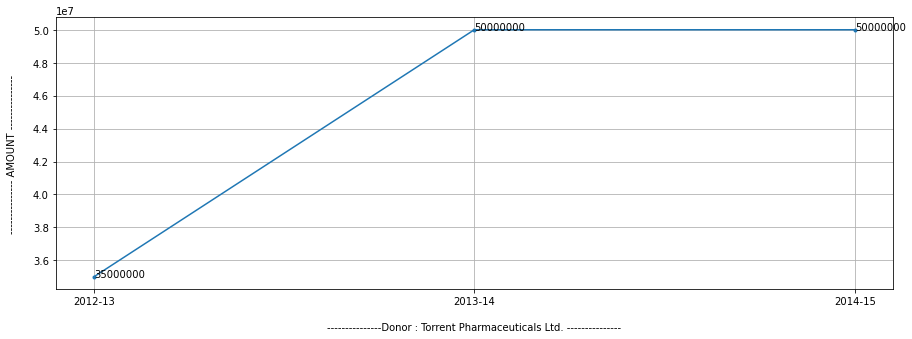

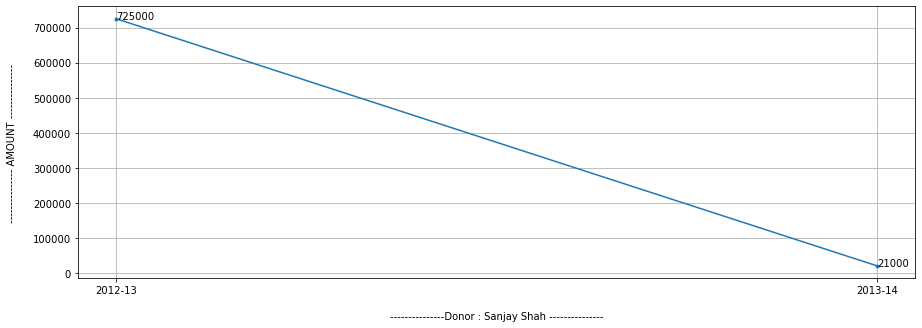

In [314]:
display(HTML(f"<h1 style='text-align: center;'>Top Most {len(fund_donator)} Donars </h1>"))
print('\n')
for i in range(len(fund_donator)):
    top_donator = data[data['Name'] == fund_donator['name'][i]] 
    top_doner = top_donator.groupby('Financial Year ').sum()

    plt.figure(figsize=(15,5))
    plt.plot(top_doner['Amount'].index , top_doner['Amount'],marker='.')
    plt.grid() 
    plt.xlabel(f'\n---------------Donor : {fund_donator["name"][i]} ---------------')
    plt.ylabel('--------------- AMOUNT ---------------\n')
    display(HTML(f'<p style="font-size:20px;"><b>{fund_donator["name"][i]}</b> donate <b>{len(top_donator)} times</b> in 12 Years</p>'))
    
    for i in range(len(top_doner)):
        plt.text(top_doner['Amount'].index[i],top_doner['Amount'][i],top_doner['Amount'][i]) # for graph values show

    plt.show()

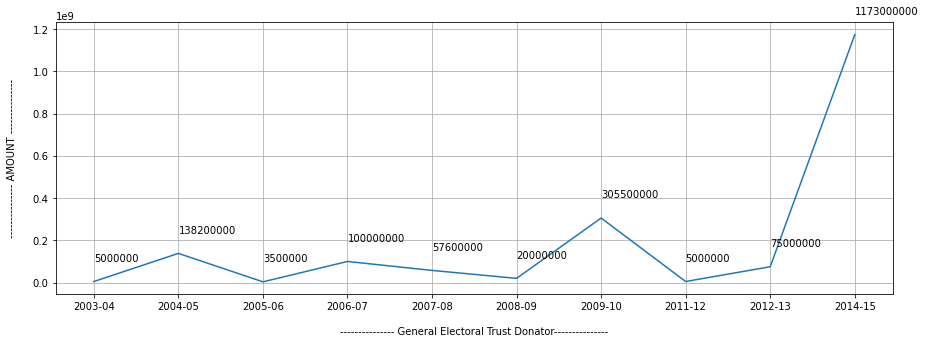

In [311]:
# top Donator 
top_donator = data[data['Name'] == 'General Electoral Trust']
top_1 = top_donator.groupby('Financial Year ').sum()

plt.figure(figsize=(15,5))
plt.plot(top_1['Amount'].index , top_1['Amount'].values)
plt.grid()
plt.xlabel('\n--------------- General Electoral Trust Donator---------------')
plt.ylabel('--------------- AMOUNT ---------------\n')
display(HTML(f'<p style="font-size:20px;"><b>General Electoral Trust</b> donate <b>{len(top_donator)} times</b> in 12 Years</p>'))

for i in range(len(top_1)):
    plt.text(top_1['Amount'].index[i],top_1['Amount'][i]+95090000,top_1['Amount'][i]) # for graph values show

plt.show()

In [257]:
top_1

,Amount
Financial Year,
2003-04,5000000
2004-05,138200000
2005-06,3500000
2006-07,100000000
2007-08,57600000
2008-09,20000000
2009-10,305500000
2011-12,5000000
2012-13,75000000


In [262]:
top_1['Amount'].values

array([   5000000,  138200000,    3500000,  100000000,   57600000,
         20000000,  305500000,    5000000,   75000000, 1173000000],
      dtype=int64)

In [227]:
top_1['Amount'][2]

3500000

In [231]:
top_1['Amount'].index[2]

'2005-06'

In [233]:
top_1['Amount'][2]

3500000

In [240]:
len(top_1)

10

In [236]:
200000000 - top_1['Amount'][2]

196500000

In [298]:
top_1['Amount'][0]*0.10

500000.0